**INF2178 Assignment 2**\
**Chenyang Pan**\
**1005131554**

In [59]:
# run this code to upload the data
from google.colab import files
files_upload = files.upload()

In [60]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat


In [61]:
# read in the childcare data into dataframe
childcare_df = pd.read_excel('INF2178_A2_data.xlsx')

**Data Cleaning**

In [62]:
# preview of the  data
childcare_df.head(6)

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
5,6,1021,Centennial College Progress Campus Child Care ...,Non Profit Agency,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y


In [63]:
# only keep revelant columns
childcare_df.drop(["_id", "LOC_NAME", "IGSPACE","TGSPACE",	"PGSPACE",
                   "KGSPACE",	"SGSPACE","LOC_ID", "ADDRESS", "PCODE",
            "ward", "BLDGNAME", "cwelcc_flag", "bldg_type"], axis=1,  inplace = True)
#remove NA terms
childcare_df.dropna(inplace = True)

In [64]:
childcare_df.head(6)

,AUSPICE,TOTSPACE,subsidy
0,Non Profit Agency,164,Y
1,Non Profit Agency,83,Y
2,Non Profit Agency,102,Y
3,Non Profit Agency,65,Y
4,Non Profit Agency,26,Y
5,Non Profit Agency,62,Y


**Prelimiary Analysis**

Text(0.5, 0, 'AUSPICE')

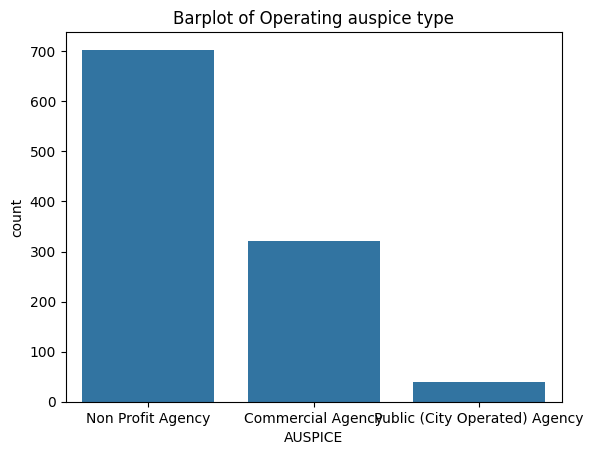

In [65]:
# barplot of AUSPICE
sns.countplot(data= childcare_df, x='AUSPICE')
plt.title('Barplot of Operating auspice type')
plt.xlabel('AUSPICE')

Text(0.5, 0, 'subsidy')

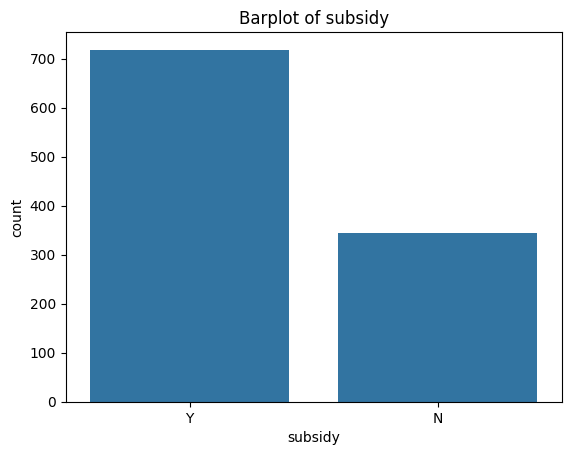

In [66]:
# barplot of subsidy
sns.countplot(data= childcare_df, x='subsidy')
plt.title('Barplot of subsidy')
plt.xlabel('subsidy')

Text(0.5, 9.444444444444438, 'total space')

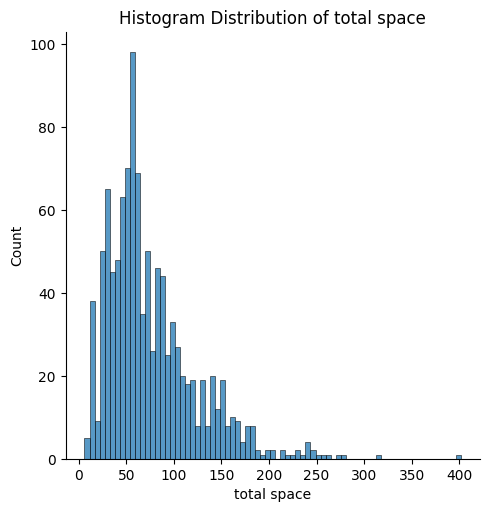

In [67]:
#histograms
# Histogram Distribution of total space
sns.displot(childcare_df["TOTSPACE"], bins=75)
plt.title('Histogram Distribution of total space')
plt.xlabel('total space')

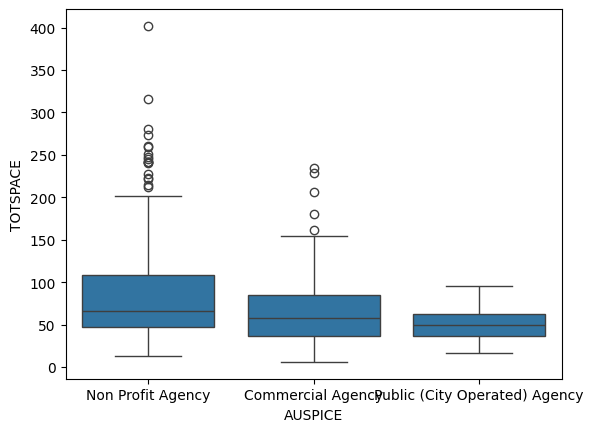

In [68]:
# boxplot of TOTSPACE by AUSPICE
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data = childcare_df)
plt.show()

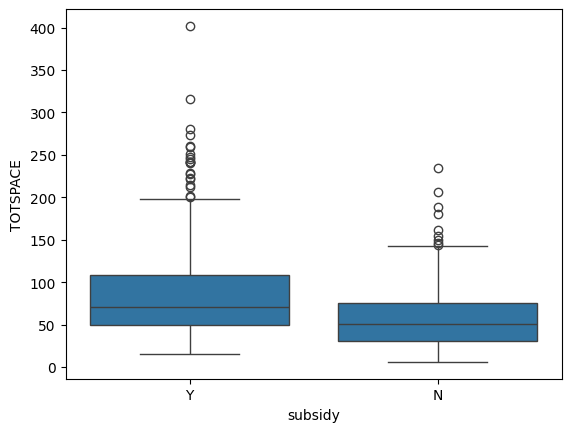

In [69]:
# boxplot of TOTSPACE by subsidy
ax = sns.boxplot(x = 'subsidy', y = 'TOTSPACE', data = childcare_df)

<Axes: xlabel='AUSPICE', ylabel='TOTSPACE'>

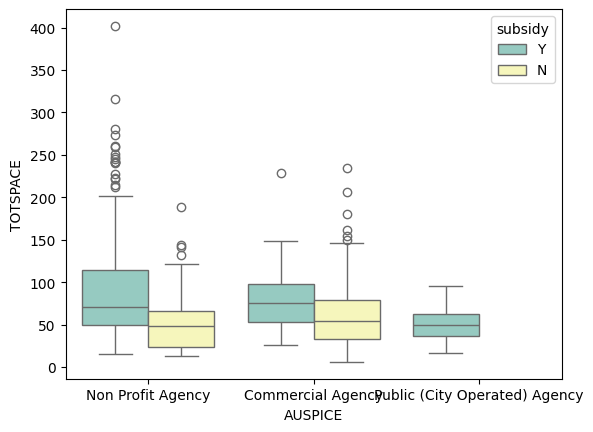

In [70]:
# boxplot of total space with and without subsidy by operating auspcie type
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data= childcare_df, palette="Set3")

**Narrative About the Data**

As we look at the initial data set, we only want to keep the features that we are interested in this analysis. We keeped “AUSPICE”, the operating auspice type, “TOTSPACE” the total space capacity, and “subsidy” whether the institution has subsidy. The AUSPICE, and subsidy are two potential independent variables (categorical) and the TOTSPACE is the potential response variable in our analysis. I first made a barplot based on the subsidy and auspice type to see visually how many institutions have subsidies and how many do not and the distribution of the number of each auspice type. I found that the number of institutions that have subsidies is almost two times that of institutions without subsidies and that only very few institutions are city operational agencies. By looking at the histogram distribution of the total space in the child care institutions, the histogram is overall right skewed and unimodal. There are also outliers that can be found at 400 capacity spaces. I then made three side by side boxplots of the total space in the childcare institutions based on the auspice type, subsidy and subsidy by auspice. From the first side by side boxplot, we can see that Non profit agency auspice has the highest median and public agency has the lowest, this may give us that insight that the may be non profit agency childcare institutions can have larger capacity for children. And from the side by side boxplot of the subsidy, we can see that the median total space of the institution with subsidy is greater than those without subsidy, which is as expected. By looking at the last boxplot of total space based on subsidy by auspice type, we see that for non profit agencies and commercial agencies, the total space of the institution with subsidy has much greater median value than those without subsidy. However, we have found that all public agency institutions have subsidies. This observation will not bring us a very significant effect in our analysis since there are only very few public agency institutions. From all the boxplots except the total space of the public agency child care institution , I have detected extreme values on the right end of the plot.

**One-way ANOVA**

In [71]:
# code refer to inf2178 lecture
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=childcare_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA table
res = stat()
res.anova_stat(df= childcare_df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [72]:
# code refer to inf2178 lecture
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=childcare_df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


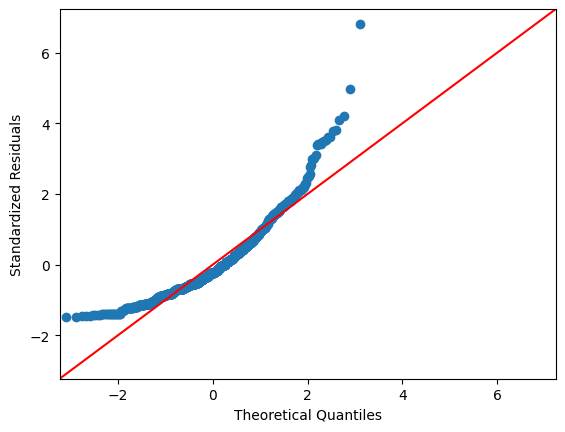

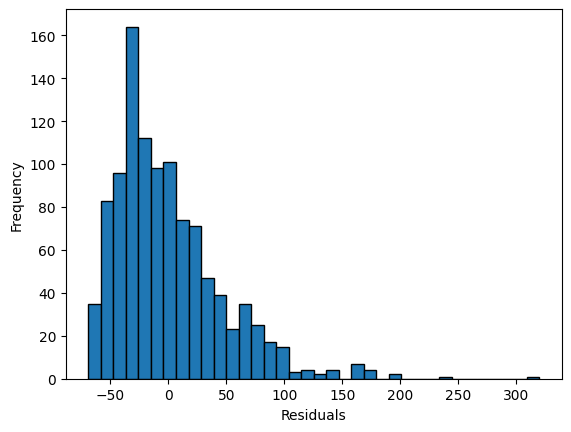

In [73]:
# code refer to inf2178 lecture
# model diagontics check
import statsmodels.api as sm
import matplotlib.pyplot as plt

# check assumption normalty with QQ plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [74]:
# code refer to inf2178 lecture
# Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [75]:
# code refer to inf2178 lecture
# since sample is not normally distributed
# test for Homogeneity of variance
res.levene(df= childcare_df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


**Two-way ANOVA**

In [76]:
# code refer to inf2178 lecture
# ordinary least square model fit
model=ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=childcare_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# ANOVA Table
res = stat()
res.anova_stat(df= childcare_df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


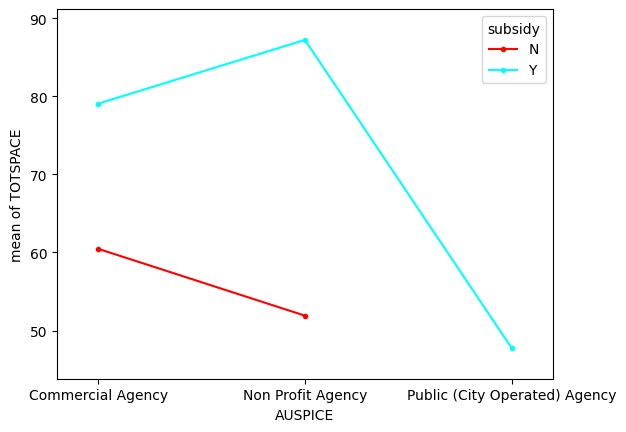

In [77]:
# code refer to inf2178 lecture
# interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=childcare_df['AUSPICE'],trace=childcare_df['subsidy'],response=childcare_df['TOTSPACE'])
plt.show()

In [78]:
# code refer to inf2178 lecture
#post hoc test using Tukey's HSD
res.tukey_hsd(df= childcare_df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.905213,24.333621,7.876596,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.716448,51.952772,6.468588,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-0.945610,35.375996,3.146407,0.067567


In [79]:
#post hoc test using Tukey's HSD
res.tukey_hsd(df= childcare_df, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,26.265831,20.400592,32.13107,12.426982,0.001


In [80]:
#post hoc test using Tukey's HSD
res.tukey_hsd(df= childcare_df, res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.377488,49.277825,10.224542,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.512442,23.843471,2.102822,0.650278
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861524,36.667669,10.911871,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.934574,60.986199,7.401338,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",27.162142,7.567922,46.756362,5.596861,0.001135
6,"(Non Profit Agency, N)","(Commercial Agency, N)",8.563060,-6.805934,23.932054,2.249531,0.590448
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.132730,-20.392680,28.658140,0.680345,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",18.599082,1.646292,35.551872,4.429542,0.021963


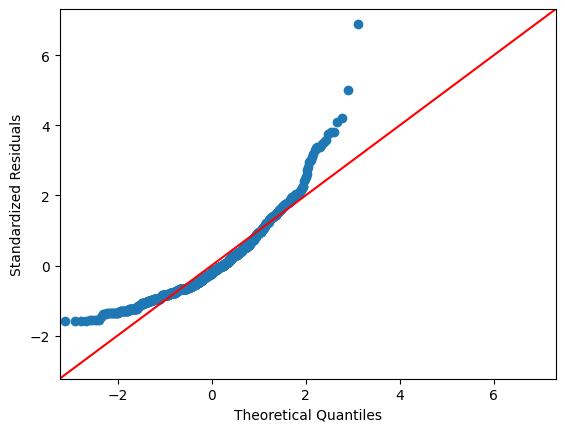

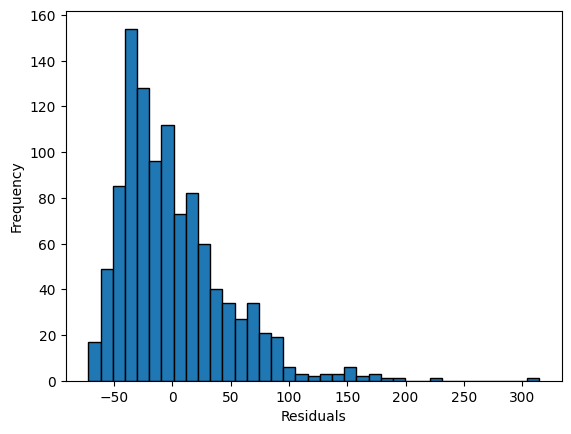

In [81]:
# code refer to inf2178 lecture
# check assumption normalty with QQ plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [82]:
# code refer to inf2178 lecture
# Shapiro Wilk testo
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9018619656562805 1.5311055543621852e-25


In [83]:
# code refer to inf2178 lecture
# check Homogeneity of variacne
res.levene(df= childcare_df, res_var='TOTSPACE', xfac_var= "subsidy")
res.levene_summary

,Parameter,Value
0,Test statistics (W),22.9889
1,Degrees of freedom (Df),1.0000
2,p value,0.0000


In [84]:
# check homogenity of variacne
res.levene(df= childcare_df, res_var='TOTSPACE', xfac_var= "AUSPICE")
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000
